In [1]:
from pathlib import Path

import mammos_entity as me

In [2]:
parameter_files = list(Path("./out").glob(pattern="T_*/parameters.json"))

In [3]:
parameter_files

[PosixPath('out/T_0.0/parameters.json'),
 PosixPath('out/T_1044.8048674219485/parameters.json'),
 PosixPath('out/T_122.91821969669984/parameters.json'),
 PosixPath('out/T_184.37732954504975/parameters.json'),
 PosixPath('out/T_245.83643939339967/parameters.json'),
 PosixPath('out/T_307.2955492417496/parameters.json'),
 PosixPath('out/T_368.7546590900995/parameters.json'),
 PosixPath('out/T_430.21376893844945/parameters.json'),
 PosixPath('out/T_491.67287878679934/parameters.json'),
 PosixPath('out/T_553.1319886351492/parameters.json'),
 PosixPath('out/T_61.45910984834992/parameters.json'),
 PosixPath('out/T_614.5910984834992/parameters.json'),
 PosixPath('out/T_676.0502083318491/parameters.json'),
 PosixPath('out/T_737.509318180199/parameters.json'),
 PosixPath('out/T_798.9684280285489/parameters.json'),
 PosixPath('out/T_860.4275378768989/parameters.json'),
 PosixPath('out/T_921.8866477252487/parameters.json'),
 PosixPath('out/T_983.3457575735987/parameters.json')]

In [4]:
T = []
Hc = []
Mr = []
BHmax = []

In [5]:
import json

In [6]:
for file in parameter_files:
    with open(file) as handle:
        param_dict = json.load(handle)
        T.append(param_dict["T"])
        Hc.append(param_dict["Hc"])
        Mr.append(param_dict["Mr"])
        BHmax.append(param_dict["BHmax"])

In [7]:
import pandas as pd

In [8]:
parameters_df = pd.DataFrame(
    {
        "T": T,
        "Hc": Hc,
        "Mr": Mr,
        "BHmax": BHmax,
    }
)

In [9]:
parameters_df.sort_values("T", inplace=True, ignore_index=True)

In [10]:
parameters_df

,T,Hc,Mr,BHmax
0,0.000000,3.049706e+06,1.159973e+06,1.693270e+05
1,61.459110,2.784764e+06,1.150638e+06,1.672520e+05
2,122.918220,2.784666e+06,1.133872e+06,1.635249e+05
3,184.377330,2.784454e+06,1.112404e+06,1.587526e+05
4,245.836439,2.519429e+06,1.087120e+06,1.531319e+05
5,307.295549,2.519143e+06,1.058451e+06,1.467583e+05
6,368.754659,2.254117e+06,1.026607e+06,1.396786e+05
7,430.213769,1.988985e+06,9.916573e+05,1.319077e+05
8,491.672879,1.988699e+06,9.535544e+05,1.234350e+05
9,553.131989,1.723615e+06,9.121375e+05,1.142242e+05


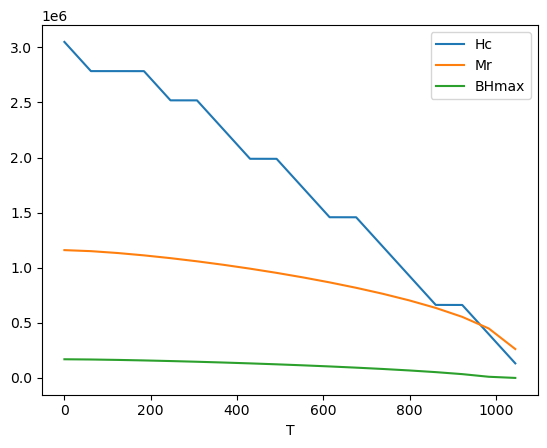

In [11]:
parameters_df.plot(x="T");

This looks OK as the values are going down with increasing temperature

In [12]:
me.io.entities_to_file(
    "hystloop_extrinsic_properties.csv",
    "These extrinsic properties were calculated using mammos-spindynamics and mammos-mumag simulations.",
    T=me.T(parameters_df["T"]),
    Hc=me.Hc(parameters_df["Hc"]),
    Mr=me.Mr(parameters_df["Mr"]),
    BHmax=me.BHmax(parameters_df["BHmax"]),
)